In [2]:
import joblib
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

In [3]:
path = 'preprocessed_data/'
X_train = pd.read_csv(path + 'xtrain_scaled.csv')
X_train_analytics = pd.read_csv(path + 'xtrain_preprocessed.csv')
y_train_analytics = pd.read_csv(path + 'ytrain_preprocessed.csv')
X_test = pd.read_csv(path + 'xtest_scaled.csv')

display(X_train.shape, X_train.head())

(1314, 81)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.456307,0.376975,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.836328,1.0,1.00,1.0,1.0,0.559475,0.0,0.0,0.522954,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.451188,0.399372,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.798402,1.0,1.00,1.0,1.0,0.434223,0.0,0.0,0.405878,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.389750,0.347009,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.856758,1.0,1.00,1.0,1.0,0.626948,0.0,0.0,0.586023,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.440101,0.493613,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.837572,1.0,1.00,1.0,1.0,0.566637,0.0,0.0,0.529649,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.573317,0.402631,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.833076,1.0,0.75,1.0,1.0,0.548737,0.0,0.0,0.512917,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [4]:
# load the target (log transformed)
y_train = pd.read_csv(path + 'ytrain_scaled.csv')
y_test = pd.read_csv(path + 'ytest_scaled.csv')

y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


<h2> Feature Selection with LASSO Regression

In [5]:
selective_model = SelectFromModel(Lasso(alpha=0.001, random_state=0))

selective_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [6]:
selective_model.get_support().sum()

37

In [7]:
selected_columns_mask = selective_model.get_support()

selected_columns = X_train.columns[selected_columns_mask]
selected_columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [8]:
# Use only the selected columns for the model
X_train_selected = selective_model.transform(X_train)
X_test_selected = selective_model.transform(X_test)

X_train_selected.shape

(1314, 37)

<h2> Regression Model - Evaluation

In [9]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² score: 0.8890
Mean Absolute Error (MAE): 0.0950
Root Mean Squared Error (RMSE): 0.1233


In [10]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Compute MAE in the original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
rmse_original = mean_squared_error(y_test_original, y_pred_original)

print(f"MAE (Original Scale): ${mae_original:.2f}")
print(f"RMSE (Original Scale): ${rmse_original:.2f}")

MAE (Original Scale): $17655.30
RMSE (Original Scale): $967825593.01


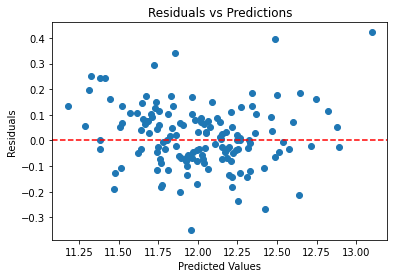

In [11]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.show()

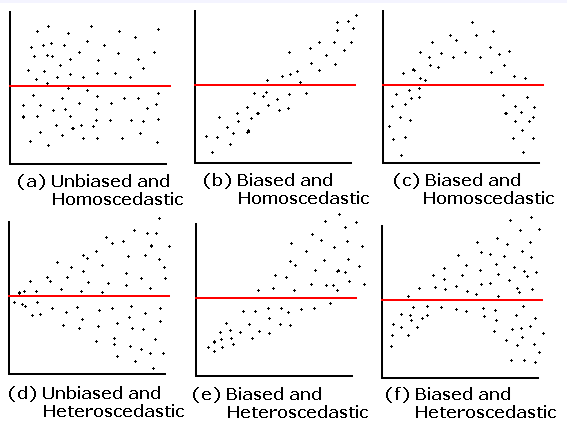

In [12]:
image_path = "imgs/residualsvsYpred.png"
img = Image.open(image_path)
display(img)

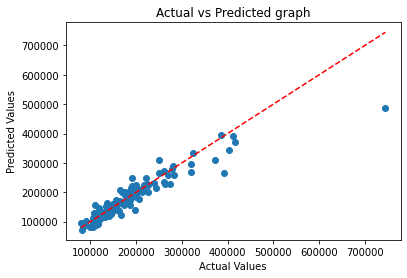

In [13]:
plt.scatter(y_test_original, y_pred_original)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='r', linestyle='--') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted graph')
plt.show()

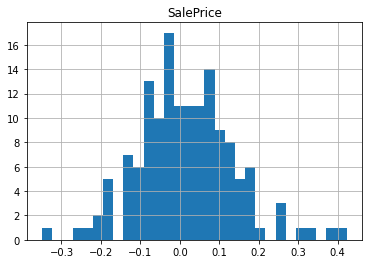

In [14]:
residuals.hist(bins=30)
plt.show()

In [15]:
joblib.dump(model, 'model/linear_regression_model.joblib') 

['model/linear_regression_model.joblib']

<h2> Coefficient Analysis

In [16]:
coefficients = model.coef_
feature_names = X_train[selected_columns].columns

In [17]:
feature_names

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [18]:
coefficients_regression_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients.flatten()
})

coefficients_regression_df.head()

,Feature,Coefficient
0,MSSubClass,0.019242
1,MSZoning,0.100884
2,LotArea,0.235246
3,LotShape,0.001356
4,LandContour,0.045816


In [19]:
coefficients_regression_df.sort_values('Coefficient', ascending=False);

features =  ['GrLivArea', 'TotalBsmtSF', 'BsmtFullBath']
# ['GrLivArea', 'TotalBsmtSF', 'BsmtFullBath']

coeff_df = coefficients_regression_df[coefficients_regression_df['Feature'].isin(features)]
coeff_df

,Feature,Coefficient
17,TotalBsmtSF,0.096857
22,GrLivArea,0.721196
23,BsmtFullBath,0.119732


A 1% increase in GrLivArea results in an estimated 0.721% increase in SalePrice.

<h2> Analytics

the model has been trianed with: log(SalePrice) = β0 + β1 * log(GrLivArea) + .....
    
where β1 = 0.721 and 1% increase in the variable will result in 0.721% increase in SalesPrice

In [20]:
original_df = pd.read_csv('data/train.csv')
original_df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [21]:
mean_grlivarea = np.exp(X_train_analytics["GrLivArea"].mean())  
mean_saleprice = np.exp(y_train_analytics['SalePrice'].mean())  

percent_increase = 10 / 100

# log increase of target
log_price_change = 0.72 * percent_increase 

# Μετατροπή αλλαγής σε ποσοστιαία αύξηση (original scale)
price_change_percentage = np.expm1(log_price_change)

# Υπολογισμός νέας τιμής SalesPrice (original scale)
new_saleprice = mean_saleprice * (1 + price_change_percentage)

print(f"An increase of 10% in GrLivArea (initial units) results in an increase of {price_change_percentage * 100:.2f}% in SalesPrice (initial units).")
print(f"The new predicted price will be ${new_saleprice:.2f}.")

An increase of 10% in GrLivArea (initial units) results in an increase of 7.47% in SalesPrice (initial units).
The new predicted price will be $179168.25.


In [22]:
import sys
print(sys.executable)

C:\Anaconda3\python.exe


In [23]:
#python -c "import sys; print(sys.executable)"


In [25]:
from sklearn.linear_model import BayesianRidge
import seaborn as sns

In [26]:
selected_bayes_features = ["TotalBsmtSF", "GrLivArea", "BsmtFullBath"]
# X_train_bayes = X_train[selected_bayes_features]
# X_test_bayes = X_test[selected_bayes_features]

X_train_bayes = X_train[selected_bayes_features]
X_test_bayes = X_test[selected_bayes_features]

In [48]:
bayes_ridge = BayesianRidge(n_iter=100)
bayes_ridge.coef_ = coefficients
bayes_ridge.fit(X_train_selected, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(n_iter=100)

In [50]:
samples = np.random.multivariate_normal(bayes_ridge.coef_, bayes_ridge.sigma_, size=5000)
samples;

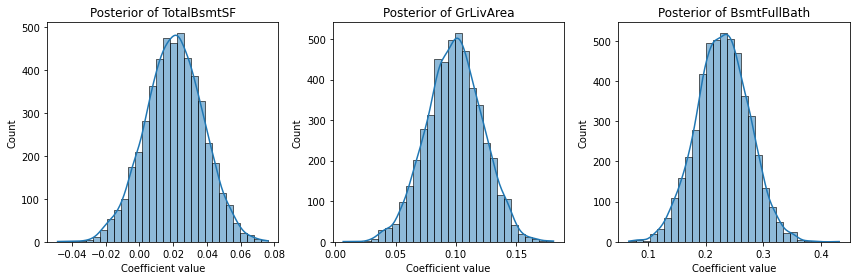

In [51]:
plt.figure(figsize=(12, 4))
for i, feature in enumerate(selected_bayes_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(samples[:, i], bins=30, kde=True)
    plt.title(f"Posterior of {feature}")
    plt.xlabel("Coefficient value")
plt.tight_layout()
plt.show()


In [52]:
for i, feature in enumerate(selected_bayes_features):
    lower, upper = np.percentile(samples[:, i], [5, 95])
    print(f"{feature}: 90% credible interval: ({lower:.4f}, {upper:.4f})")

TotalBsmtSF: 90% credible interval: (-0.0079, 0.0483)
GrLivArea: 90% credible interval: (0.0606, 0.1375)
BsmtFullBath: 90% credible interval: (0.1529, 0.3028)


In [60]:
print(f"Alpha (precision of weights): {bayes_ridge.alpha_}")
print(f"Lambda (precision of noise): {bayes_ridge.lambda_}")

Alpha (precision of weights): 47.277554443563915
Lambda (precision of noise): 7.403505373233298
